# THE SPARKS FOUNDATION - GRIP

# DATA SCIENCE AND BUSINESS ANALYTICS

# NAME: ANANYA M

# TASK 1: Prediction Using Supervised ML

Q) Predict the percentage of a student based on the no. of hours of study

# Importing the Libraries

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


# Data Overview

In [49]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [50]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [51]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64


Next we will plot our data points on 2d graph and see if we can find any relationship between the data

By using plot() function of the pandas dataframe and we will pass it to the column names for x-coordinate i.e ''Hours" and y-coordinate i.e "Scores"

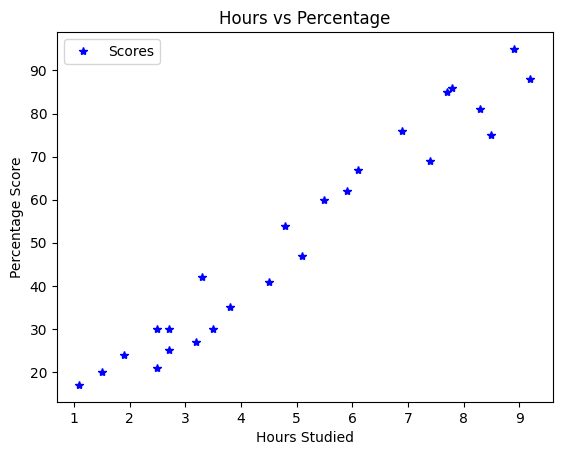

In [52]:
data.plot(x='Hours', y='Scores',style= '*',color='blue')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# From the above graph, we can see that there is a positive linear relationship between the number of hours studied and scores obtained.

# Preparing the Data

In [53]:

X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values 

In [54]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [55]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:. The below code will split 80 % of the data to training set and 20 % of the data to the test set.

In [56]:

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

# Training the Simple Linear Regression model on the Training set

In [57]:

from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
print("Training complete.")

Training complete.


# Visualization

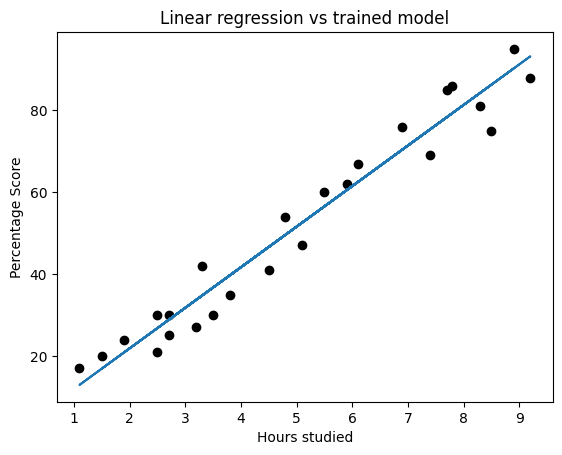

In [58]:
line = regressor.coef_*X+regressor.intercept_
plt.title("Linear regression vs trained model")
plt.scatter(X, y, color= 'black')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.plot(X, line);
plt.show()

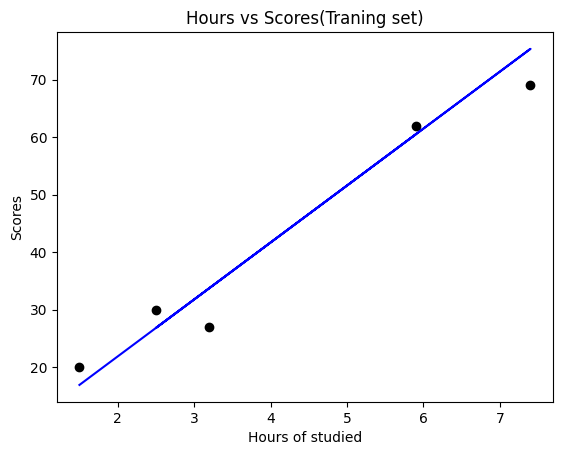

In [59]:
plt.scatter(X_test , y_test , color = "black")
plt.plot(X_test , regressor.predict(X_test) , color = "blue")
plt.title('Hours vs Scores(Traning set)')
plt.xlabel('Hours of studied')
plt.ylabel('Scores')
plt.show()

# Predictions

In [60]:
print(X_test) 
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [61]:

y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [62]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


<Axes: >

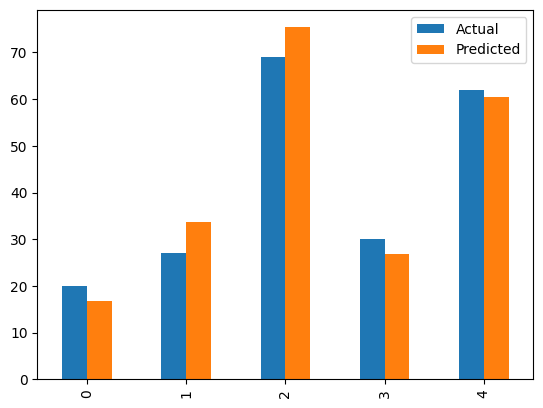

In [63]:
df.plot(kind='bar') 

In [64]:

hours = 9.25
test=np.array([hours])
test=test.reshape(-1,1)
pred = regressor.predict([[9.5]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = 96.16939660753592


In [65]:
from sklearn import metrics 

In [66]:
print('Mean Absolute Error Is : ' , metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error Is : ' , metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error Is : ' , np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

Mean Absolute Error Is :  4.183859899002975
Mean Squared Error Is :  21.598769307217406
Root Mean Squared Error Is :  2.0454485813637495


In [67]:
print("Slope of Regression Line ",regressor.coef_)
print("Y-intercept Of Regression Line",regressor.intercept_)

Slope of Regression Line  [9.91065648]
Y-intercept Of Regression Line 2.0181600414346974
